In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df.drop(columns=["ID", "ZIP Code"], inplace=True)

df = df[df["Experience"] >= 0]


print(df.info())
print(df.describe())
print(df["Personal Loan"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 4948 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4948 non-null   int64  
 1   Experience          4948 non-null   int64  
 2   Income              4948 non-null   int64  
 3   Family              4948 non-null   int64  
 4   CCAvg               4948 non-null   float64
 5   Education           4948 non-null   int64  
 6   Mortgage            4948 non-null   int64  
 7   Personal Loan       4948 non-null   int64  
 8   Securities Account  4948 non-null   int64  
 9   CD Account          4948 non-null   int64  
 10  Online              4948 non-null   int64  
 11  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 502.5 KB
None
               Age   Experience       Income       Family        CCAvg  \
count  4948.000000  4948.000000  4948.000000  4948.000000  4948.000000   
mean  

In [3]:
X = df.drop("Personal Loan", axis=1)
y = df["Personal Loan"]


missing_values = X.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

X.fillna(X.mean(), inplace=True)


Missing Values:
 Series([], dtype: int64)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


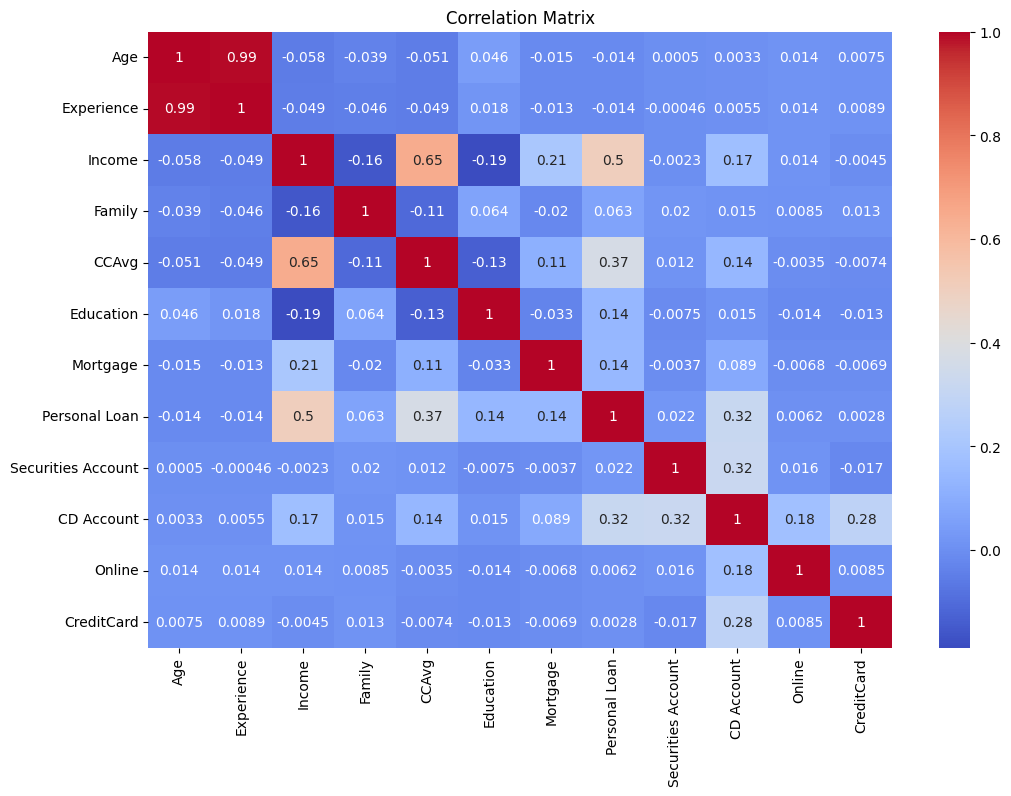

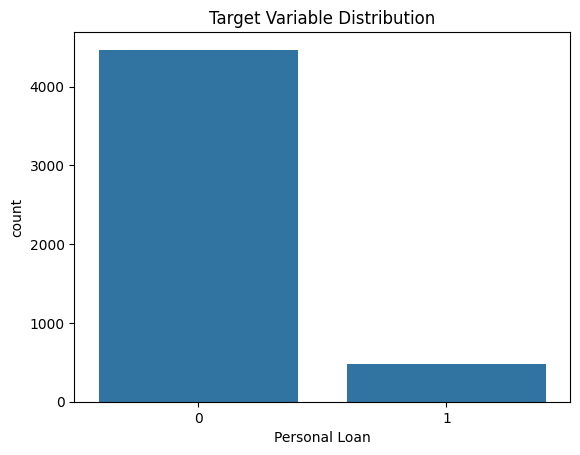

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


sns.countplot(x="Personal Loan", data=df)
plt.title("Target Variable Distribution")
plt.show()


In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)



 Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       894
           1       0.95      0.92      0.93        96

    accuracy                           0.99       990
   macro avg       0.97      0.96      0.96       990
weighted avg       0.99      0.99      0.99       990

ROC-AUC: 0.9977395600298284


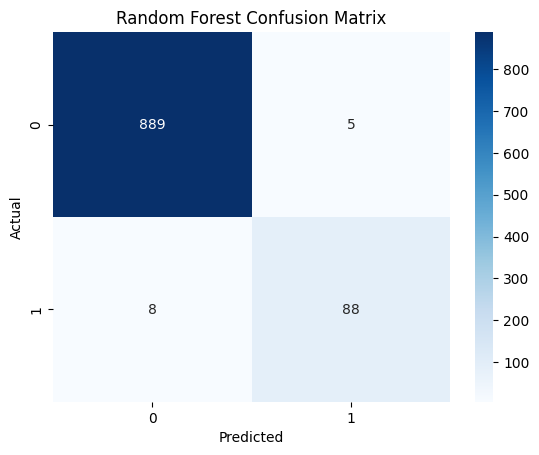

In [13]:
print("\n Random Forest:")
print(classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

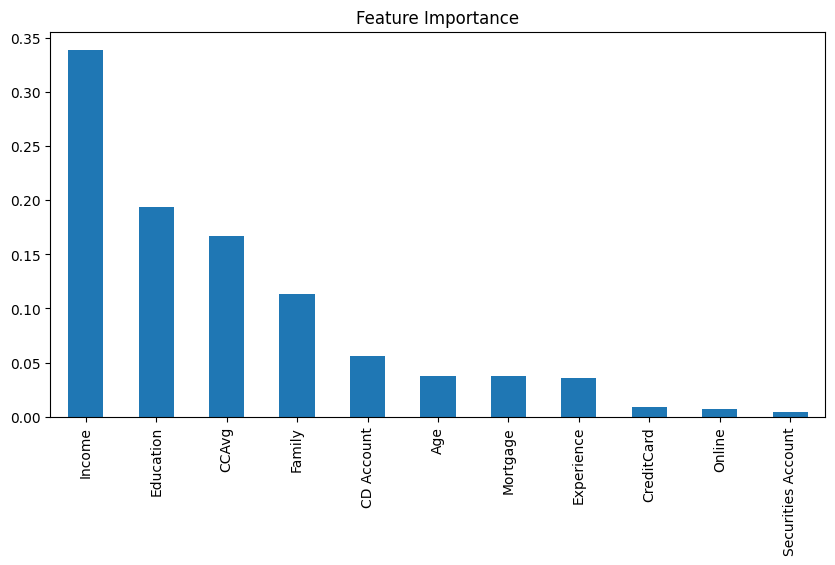

In [14]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.show()